# Part1: Image processing

In [81]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imsave
import skimage.measure 
import pickle as pkl
import os

# Import FoamQuant library
from FoamQuant import *

# Set matplotlib default font size
plt.rc('font', size=20) 

In [2]:
# Create the processing pipeline
ProcessPipeline = ['P1_Raw','P2_PhaseSegmented','P3_Cleaned','P4_BubbleSegmented','P5_BubbleNoEdge']

for Pi in ProcessPipeline:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created:',Pi)
        os.mkdir(Pi)

path already exist: P1_Raw
path already exist: P2_PhaseSegmented
path already exist: P3_Cleaned
path already exist: P4_BubbleSegmented
path already exist: P5_BubbleNoEdge


# The raw image

In [3]:
# Read/Save image names and directories
nameread = 'Raw_'
namesave = 'PhaseSegmented_'
dirread = ProcessPipeline[0]+'/'
dirsave = ProcessPipeline[1]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [4]:
# Read the first image of the series
Raw = imread(dirread+nameread+strindex(imrange[0], 3)+'.tif')

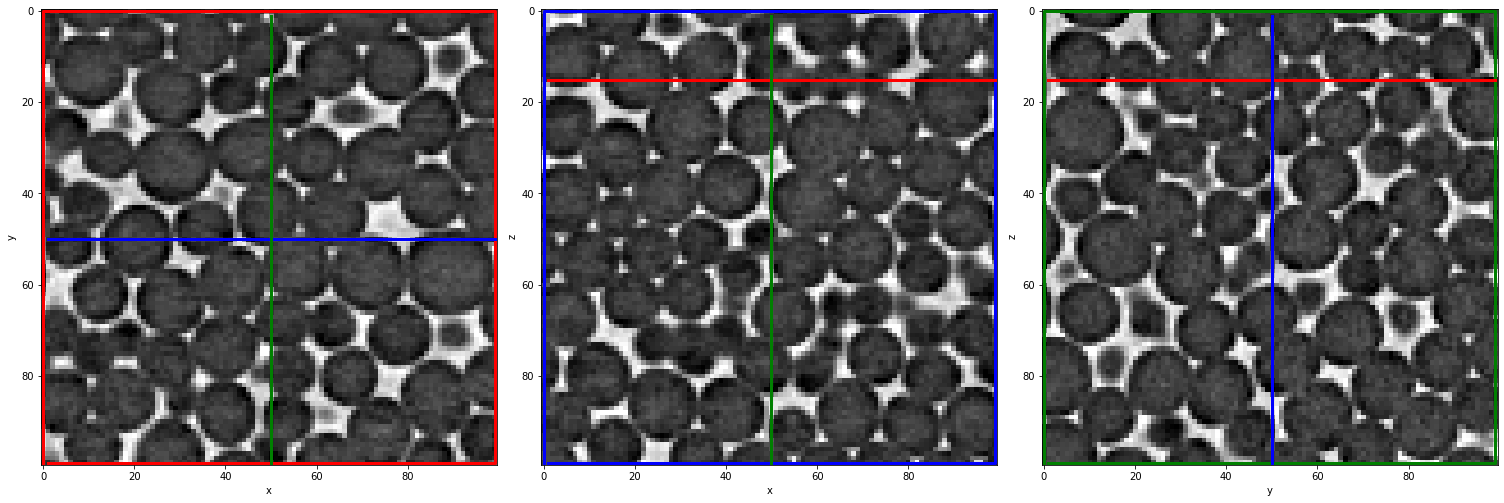

In [5]:
# Show a 3D-cut view of the volume
Cut3D(Raw, 
      showcuts=True, 
      showaxes=True, 
      figblocksize=7,
      zcut=15,       # tune this parrameter if you wish
      ycut=False,    # tune this parrameter if you wish
      xcut=False)    # tune this parrameter if you wish

# Phase segmentation

In [6]:
# Otsu simple threshold phase segmentation of the whole series
th = PhaseSegmentation_Batch(nameread, 
                             namesave, 
                             dirread, 
                             dirsave, 
                             imrange, 
                             method='ostu_global',
                             returnOtsu=True, 
                             verbose=True, 
                             n0=3, 
                             endread='.tif', 
                             endsave='.tif')

PhaseSegmented_ 1: done

PhaseSegmented_ 2: done

PhaseSegmented_ 3: done

PhaseSegmented_ 4: done

PhaseSegmented_ 5: done

PhaseSegmented_ 6: done

PhaseSegmented_ 7: done

PhaseSegmented_ 8: done

PhaseSegmented_ 9: done

PhaseSegmented_ 10: done



In [7]:
# Otsu thresholds
print('Otsu thresholds:',th)

Otsu thresholds: [125.009766, 125.009766, 125.009766, 126.00586, 126.00586, 126.00586, 126.00586, 126.00586, 126.00586, 126.00586]


In [8]:
## Let's see the result...
# Read the first image of the series
Seg = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tif')

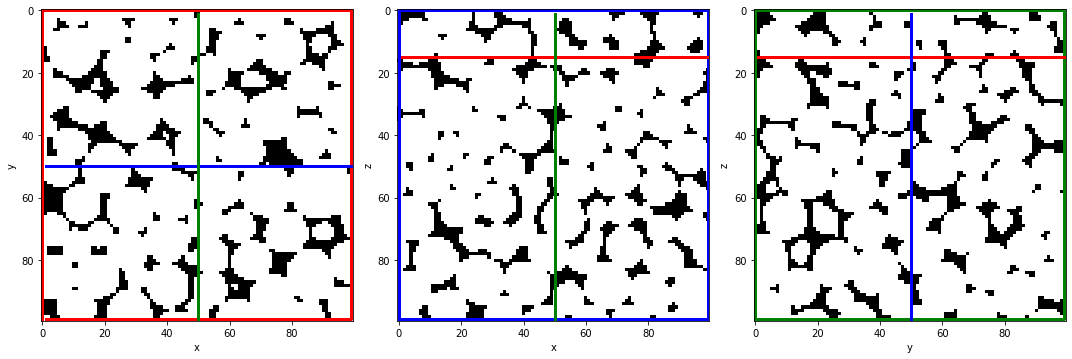

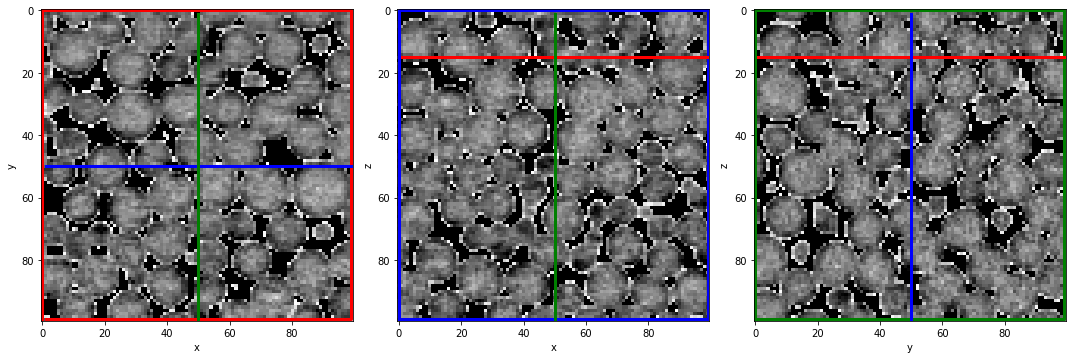

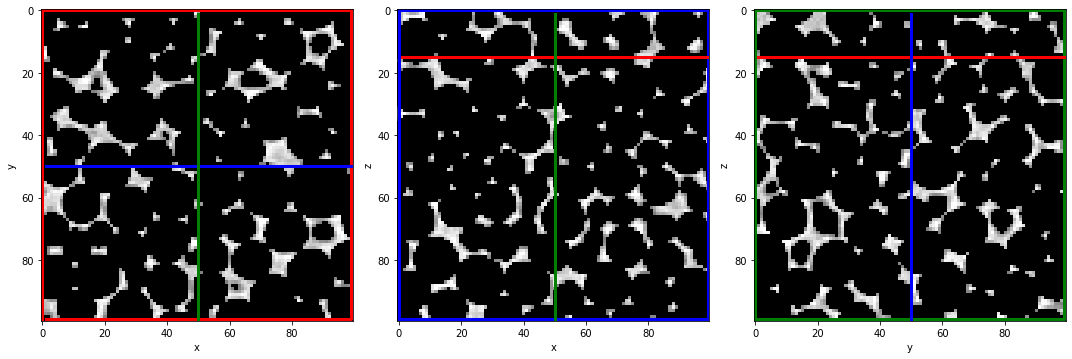

In [9]:
zcut=15       # tune this parrameter if you wish
ycut=False    # tune this parrameter if you wish
xcut=False    # tune this parrameter if you wish

# Show a 3D-cut view of the volume
Cut3D(Seg, showcuts=True, showaxes=True, figblocksize=5,zcut=zcut,ycut=ycut,xcut=xcut)         # Phase segmented image
Cut3D(Seg*Raw, showcuts=True, showaxes=True, figblocksize=5,zcut=zcut,ycut=ycut,xcut=xcut)     # Phase segmented image * Raw image
Cut3D((1-Seg)*Raw, showcuts=True, showaxes=True, figblocksize=5,zcut=zcut,ycut=ycut,xcut=xcut) # (1-Phase segmented image) * Raw image

# Remove small holes & regions

In [10]:
# Read/Save image names and directories
nameread = 'PhaseSegmented_'
namesave = 'Cleaned_'
dirread = ProcessPipeline[1]+'/'
dirsave = ProcessPipeline[2]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [11]:
# Remove all holes and objects with:
# Vobj < Cobj * max(Vobj)
# Vhole < Chole * max(Vhole)

# Since in liquid foam images, the liquid and gas phases both consist of unique large regions, 
# Cobj and Chole can be strict (large thresholds). All the other smaller regions are often due to imaging artefacts.
RemoveSpeckleBin_Batch(nameread, 
                       namesave, 
                       dirread, 
                       dirsave, 
                       imrange, 
                       verbose=True, 
                       endread='.tif', 
                       endsave='.tif', 
                       n0=3, 
                       Cobj=0.1,  # tune this parrameter if you wish
                       Chole=0.1) # tune this parrameter if you wish

Before: Nobj 3
After: Nobj 1
Before: Nobj 5
After: Nobj 1
First image (vox): maxObj 848018 maxHole 151965
Thresholds (vox): thrObj 84802 thrHole 15196 

Before: Nhol 3
After: Nhol 1
Before: Nhol 5
After: Nhol 1
Cleaned_001: done

Before: Nhol 2
After: Nhol 1
Before: Nhol 5
After: Nhol 1
Cleaned_002: done

Before: Nhol 1


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/FoamQuant/Process.py:199: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  image = remove_small_objects(label(image), min_size=Vminobj)


After: Nhol 1
Before: Nhol 5
After: Nhol 1
Cleaned_003: done

Before: Nhol 3
After: Nhol 1
Before: Nhol 3
After: Nhol 1
Cleaned_004: done

Before: Nhol 3
After: Nhol 1
Before: Nhol 2
After: Nhol 1
Cleaned_005: done

Before: Nhol 4
After: Nhol 1
Before: Nhol 3
After: Nhol 1
Cleaned_006: done

Before: Nhol 2
After: Nhol 1
Before: Nhol 4
After: Nhol 1
Cleaned_007: done

Before: Nhol 2
After: Nhol 1
Before: Nhol 3
After: Nhol 1
Cleaned_008: done

Before: Nhol 2
After: Nhol 1
Before: Nhol 6
After: Nhol 1
Cleaned_009: done

Before: Nhol 1
After: Nhol 1
Before: Nhol 8
After: Nhol 1
Cleaned_010: done



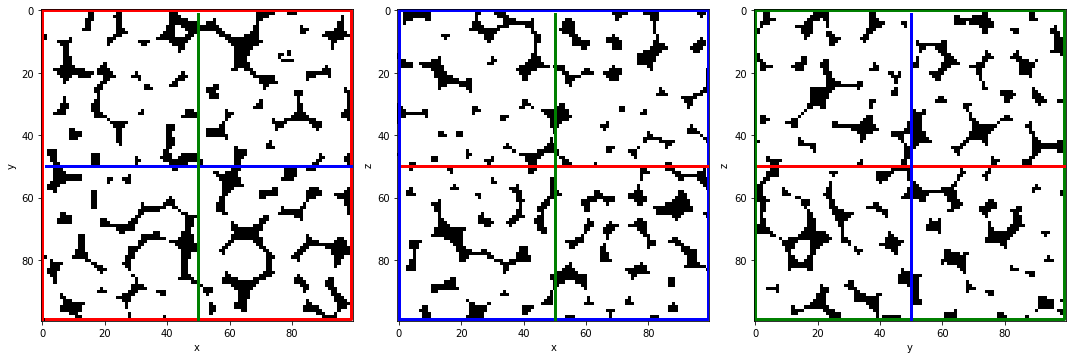

In [12]:
## Let's see the result...
# Read the first image of the series
Cleaned = imread(dirsave+namesave+strindex(imrange[1], 3)+'.tif')
# Show a 3D-cut view of the volume
Cut3D(Cleaned, showcuts=True, showaxes=True)

In [13]:
## ... we cannot see much like this
## Let's check again the number of objects and holes in the images
for imi in imrange:
    # Read the "non-cleaned" image
    NoCleaned = imread(dirread+nameread+strindex(imi, 3)+'.tif') 
    # regprops of obj and holes
    regions_obj=skimage.measure.regionprops(skimage.measure.label(NoCleaned))
    regions_holes=skimage.measure.regionprops(skimage.measure.label(NoCleaned<1))
    # number of obj and holes
    print(nameread+strindex(imi, 3),'Number of objects:',len(regions_obj), 'Number of holes:',len(regions_holes))

PhaseSegmented_001 Number of objects: 3 Number of holes: 5
PhaseSegmented_002 Number of objects: 2 Number of holes: 5
PhaseSegmented_003 Number of objects: 1 Number of holes: 5
PhaseSegmented_004 Number of objects: 3 Number of holes: 3
PhaseSegmented_005 Number of objects: 3 Number of holes: 2
PhaseSegmented_006 Number of objects: 4 Number of holes: 3
PhaseSegmented_007 Number of objects: 2 Number of holes: 4
PhaseSegmented_008 Number of objects: 2 Number of holes: 3
PhaseSegmented_009 Number of objects: 2 Number of holes: 6
PhaseSegmented_010 Number of objects: 1 Number of holes: 8


In [14]:
for imi in imrange:
    # Read the "cleaned" image
    Cleaned = imread(dirsave+namesave+strindex(imi, 3)+'.tif')
    # regprops of obj and holes
    regions_obj=skimage.measure.regionprops(skimage.measure.label(Cleaned))
    regions_holes=skimage.measure.regionprops(skimage.measure.label(Cleaned<1))
    # number of obj and holes
    print(namesave+strindex(imi, 3),'Number of objects:',len(regions_obj), 'Number of holes:',len(regions_holes))

Cleaned_001 Number of objects: 1 Number of holes: 1
Cleaned_002 Number of objects: 1 Number of holes: 1
Cleaned_003 Number of objects: 1 Number of holes: 1
Cleaned_004 Number of objects: 1 Number of holes: 1
Cleaned_005 Number of objects: 1 Number of holes: 1
Cleaned_006 Number of objects: 1 Number of holes: 1
Cleaned_007 Number of objects: 1 Number of holes: 1
Cleaned_008 Number of objects: 1 Number of holes: 1
Cleaned_009 Number of objects: 1 Number of holes: 1
Cleaned_010 Number of objects: 1 Number of holes: 1


# Labelled images

In [15]:
# Read/Save image names and directories
nameread = 'Cleaned_'
namesave = 'BubbleSeg_'
dirread = ProcessPipeline[2]+'/'
dirsave = ProcessPipeline[3]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [16]:
# Segment the bubbles with default parrameters 
# for more parrameters, try help(BubbleSegmentation_Batch)
BubbleSegmentation_Batch(nameread, 
                         namesave, 
                         dirread, 
                         dirsave, 
                         imrange, 
                         verbose=True, 
                         endread='.tif', 
                         endsave='.tif', 
                         n0=3)

Path exist: True
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_001: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_002: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_003: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_004: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_005: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_006: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_007: done

Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_008: done

Distanc

Number of labels: 1000


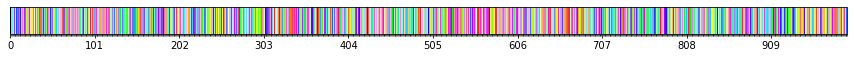

In [17]:
# Create a random colormap
rcmap = RandomCmap(1000)

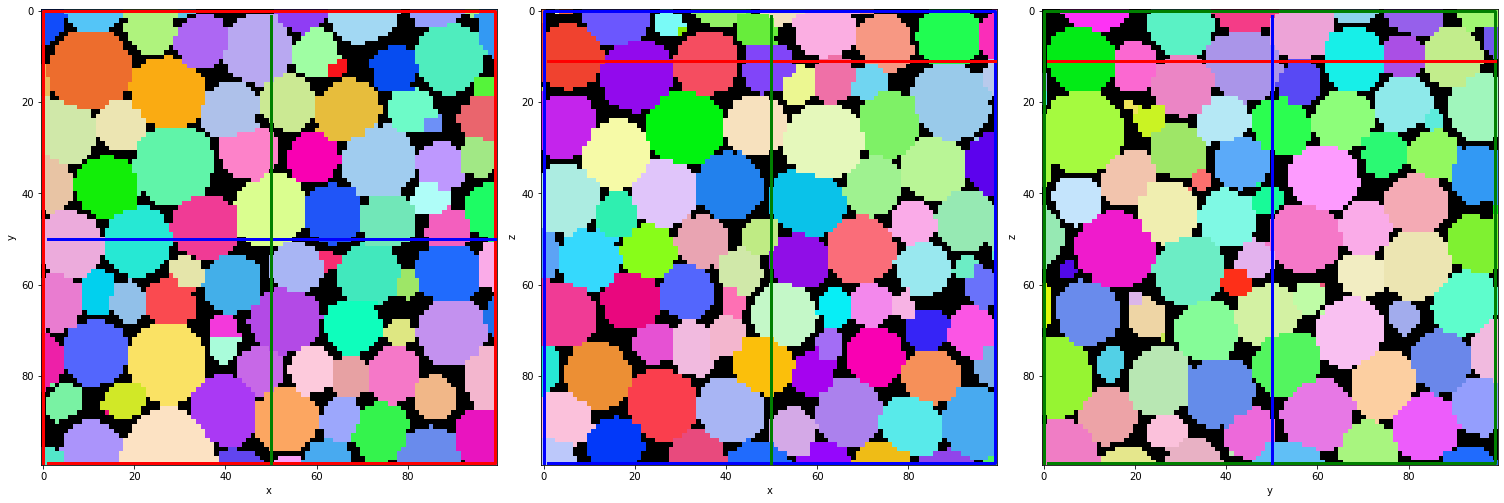

In [18]:
## Let's see the result...
# Read the first image of the series
Lab = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tif')
# Show a 3D-cut view of the volume
Cut3D(Lab, 
      showcuts=True, 
      showaxes=True, 
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=7,           # tune this parrameter if you wish
      zcut=11,                  # tune this parrameter if you wish
      ycut=False,               # tune this parrameter if you wish
      xcut=False)               # tune this parrameter if you wish

# Part2: Quantification image by image

In [19]:
# Create the quantification folders
QuantFolders = ['Q1_LiquidFraction','Q2_RegProps','Q3_Tracking','Q4_MergedTracking']

for Qi in QuantFolders:
    if os.path.exists(Qi):
        print('path already exist:',Qi)
    else:
        print('Created:',Qi)
        os.mkdir(Qi)

path already exist: Q1_LiquidFraction
path already exist: Q2_RegProps
path already exist: Q3_Tracking
path already exist: Q4_MergedTracking


# A] Liquid fraction

In [20]:
# Read/Save names and directories
nameread = 'Cleaned_'
namesave = 'LFGlob_'
dirread = ProcessPipeline[2]+'/'
dirsave = QuantFolders[0]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

## 1) Whole images liquid fraction

In [21]:
# Get the whole images liquid fraction 
# (volume percentage of liquid)
LiqFrac_Batch(nameread, 
              namesave, 
              dirread, 
              dirsave, 
              imrange, 
              TypeGrid='Global', 
              verbose=10, 
              structured=False)

Path exist: True
Liquid fraction image 1: done
crop:None
LiqFrac:0.151967
LFGlob_001: done
Liquid fraction image 2: done
crop:None
LiqFrac:0.151677
LFGlob_002: done
Liquid fraction image 3: done
crop:None
LiqFrac:0.151722
LFGlob_003: done
Liquid fraction image 4: done
crop:None
LiqFrac:0.150571
LFGlob_004: done
Liquid fraction image 5: done
crop:None
LiqFrac:0.150594
LFGlob_005: done
Liquid fraction image 6: done
crop:None
LiqFrac:0.150727
LFGlob_006: done
Liquid fraction image 7: done
crop:None
LiqFrac:0.150864
LFGlob_007: done
Liquid fraction image 8: done
crop:None
LiqFrac:0.150145
LFGlob_008: done
Liquid fraction image 9: done
crop:None
LiqFrac:0.150034
LFGlob_009: done
Liquid fraction image 10: done
crop:None
LiqFrac:0.149189
LFGlob_010: done


In [22]:
## Let's see the result...
# Read the liquid fraction of the first image of the series
with open(dirsave + namesave + '001' + '.pkl','rb') as f:
    LF = pkl.load(f)['lf']

In [23]:
print('Whole image liquid fraction:',LF,'%')

Whole image liquid fraction: 0.151967 %


## 2) Cartesian subvolumes of liquid fraction

In [24]:
# Read/Save image names and directories
nameread = 'Cleaned_'
namesave = 'LFCartesMesh_'
dirread = ProcessPipeline[2]+'/'
dirsave = QuantFolders[0]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [25]:
# Get liquid fraction in cartesian subvolumes
# (volume percentage of liquid in each subvolumes)
LiqFrac_Batch(nameread, 
              namesave, 
              dirread, 
              dirsave, 
              imrange, 
              TypeGrid='CartesMesh', 
              Nz=5,        # tune this parrameter if you wish
              Ny=5,        # tune this parrameter if you wish
              Nx=5,        # tune this parrameter if you wish
              verbose=1,
              structured=True)

Path exist: True
LFCartesMesh_001: done
LFCartesMesh_002: done
LFCartesMesh_003: done
LFCartesMesh_004: done
LFCartesMesh_005: done
LFCartesMesh_006: done
LFCartesMesh_007: done
LFCartesMesh_008: done
LFCartesMesh_009: done
LFCartesMesh_010: done


In [26]:
# Read the cartesian grid of liquid fraction
LF=[]
for imi in imrange:
    imifordir = strindex(imi, n0=3)
    with open(dirsave + namesave + imifordir + '.pkl','rb') as f:
        LF.append(pkl.load(f)['lf'])
LF=np.mean(LF,0)

vmin = 0.0 vmax = 0.36
MIN: 0.1129 MAX: 0.18101249999999997
Min0: 0.11782499999999999 Min0: 0.176425
Min1: 0.11782499999999999 Max1 0.1705625
Min2: 0.133775 Max2: 0.18031250000000001


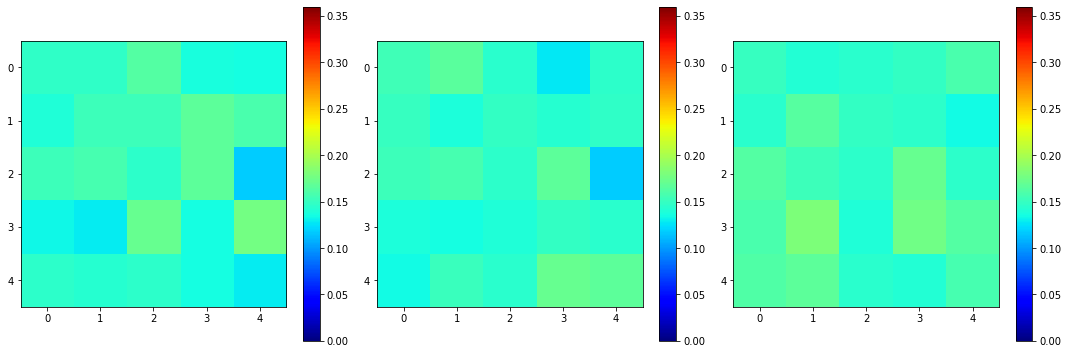

In [27]:
# If "structured=True", the liquid fraction is saved as a 3D mesh by LiqFrac_Batch
# Such as for 3D images, we can reuse Cut3D or Proj3D to vizualise the liquid-fraction meshed volume
fig,ax,neg = Cut3D(LF, 
                   vmin=0.0,    # tune this parrameter if you wish
                   vmax=0.36,   # tune this parrameter if you wish
                   cmap='jet', 
                   printminmax=True, 
                   returnfig=True, 
                   colorbars=True)

vmin = 0.0 vmax = 0.36
MIN: 0.1129 MAX: 0.18101249999999997
Min0: 0.13665 Min0: 0.16530999999999998
Min1: 0.1397875 Max1 0.1630375
Min2: 0.13962000000000002 Max2: 0.1647325


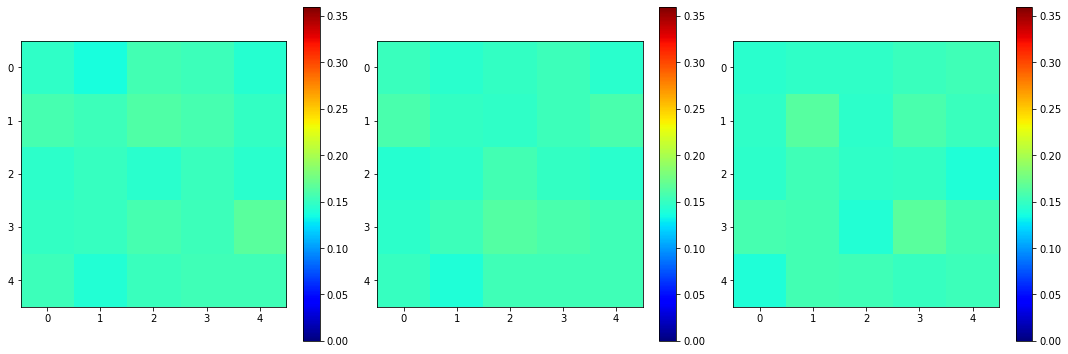

In [28]:
# The Proj3D function is similar to Cut3D, but show an average along the 3 directions
fig,ax,neg = Proj3D(LF, 
                    vmin=0.0,    # tune this parrameter if you wish
                    vmax=0.36,   # tune this parrameter if you wish
                    cmap='jet', 
                    printminmax=True, 
                    returnfig=True, 
                    colorbars=True)

In [29]:
# If "structured=False", the liquid fraction is saved as a 1D array by LiqFrac_Batch
# This may be practical if one want to plot the liquid fraction as a function of other parrameters 
# such as the cartesian/cylindrical/spherical coordinates or the bubble deformation, for example.
LiqFrac_Batch(nameread, 
              namesave, 
              dirread, 
              dirsave, 
              imrange, 
              TypeGrid='CartesMesh', 
              Nz=10,      # tune this parrameter if you wish
              Ny=5,       # tune this parrameter if you wish
              Nx=5,       # tune this parrameter if you wish
              verbose=1,
              structured=False)

Path exist: True
LFCartesMesh_001: done
LFCartesMesh_002: done
LFCartesMesh_003: done
LFCartesMesh_004: done
LFCartesMesh_005: done
LFCartesMesh_006: done
LFCartesMesh_007: done
LFCartesMesh_008: done
LFCartesMesh_009: done
LFCartesMesh_010: done


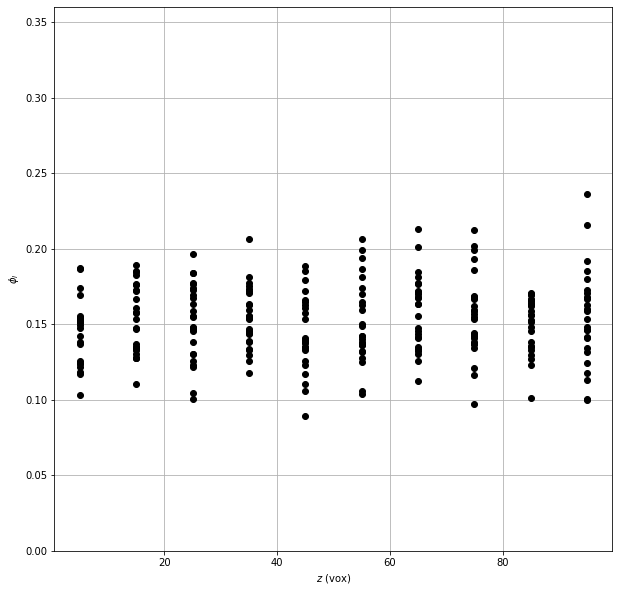

In [30]:
# We can plot the liquid fraction as a function of the z coordinate for the first image
with open(dirsave + namesave + '001' + '.pkl','rb') as f:
    pack = pkl.load(f)
lf = pack['lf']
z = pack['zgrid']

fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.plot(z, lf,'ko')
plt.xlabel(r'$z$ (vox)')
plt.ylabel(r'$\phi_l$')
plt.ylim((0,0.36))
plt.grid(True)  

# B] Individual volume, equivalent radius, sphericity, moment of inertial, strain tensor

In [31]:
# Read/Save names and directories
nameread = 'BubbleSeg_'
namesave = 'Props_'
dirread = ProcessPipeline[3]+'/'
dirsave = QuantFolders[1]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [32]:
# Get some properties in the given field of view 
# (field=[zmin,zmax,ymin,ymax,xmin,xmax])

# Label and centroid coodinate: 'lab','z','y','x'
# Volume, equivalent radius, area, sphericity: 'vol','rad','area','sph'
# Volume from ellipsoid fit: 'volfit'
# Ellipsoid three semi-axis and eigenvectors: 'S1','S2','S3','e1z','e1y','e1x','e2z','e2y','e2x','e3z','e3y','e3x',
# Internal strain components: 'U1','U2','U3'
# Internal strain von Mises invariant: 'U'
# Oblate (-1) or prolate (1) ellipsoid:'type'

RegionProp_Batch(nameread,
                 namesave,
                 dirread,
                 dirsave,
                 imrange,
                 verbose=True,
                 field=[10,80,10,80,10,80], # tune this parrameter if you wish
                 endread='.tif', 
                 endsave='.tsv')

Path exist: True
Props_001: done
Props_002: done
Props_003: done
Props_004: done
Props_005: done
Props_006: done
Props_007: done
Props_008: done
Props_009: done
Props_010: done


In [33]:
# Read the regionprop files
properties = Read_RegionProp(namesave, dirsave, imrange)

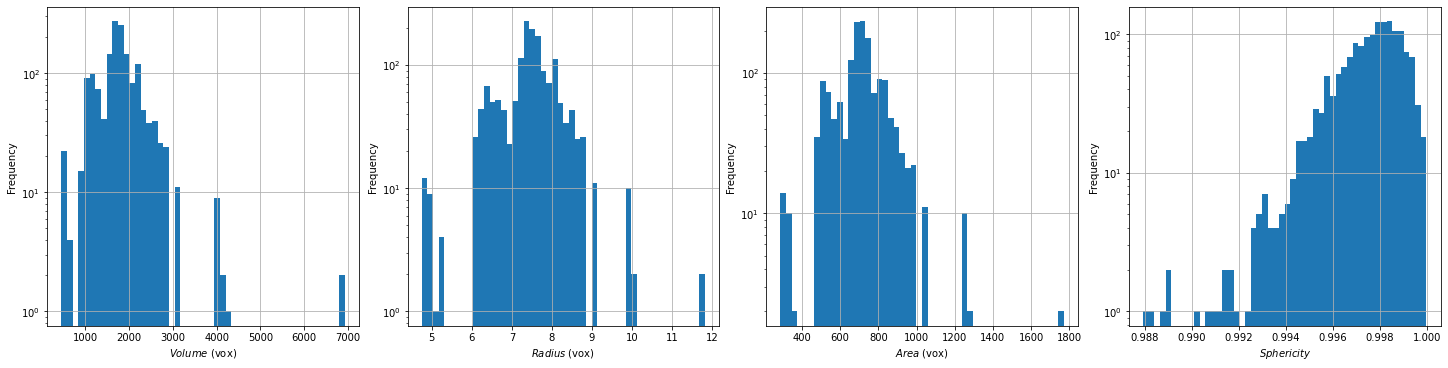

In [34]:
# histogram of some extracted properties
prop=['vol','rad','area','sph']
xlab=[r'$Volume$ (vox)',r'$Radius$ (vox)',r'$Area$ (vox)',r'$Sphericity$']

fig, ax = plt.subplots(1,4, figsize = (5*4, 5), constrained_layout=True)
for i in range(4):
    H=ax[i].hist(properties[prop[i]], bins=50)
    ax[i].set_xlabel(xlab[i])
    ax[i].set_ylabel(r'Frequency')
    ax[i].grid(True)
    ax[i].set_yscale('log')   # tune this parrameter if you wish

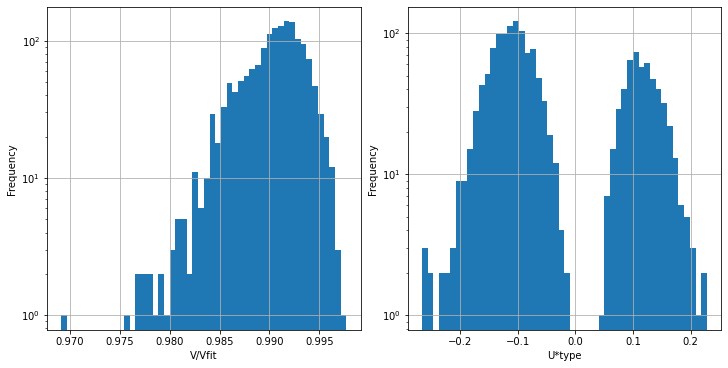

In [35]:
# histogram of some other extracted properties
fig, ax = plt.subplots(1,2, figsize = (5*2, 5), constrained_layout=True)
H=ax[0].hist(properties['vol']/properties['volfit'], bins=50)
ax[0].set_xlabel(r'V/Vfit')
H=ax[1].hist(properties['U']*properties['type'], bins=50)
ax[1].set_xlabel(r'U*type')    
for i in range(2):
    ax[i].set_ylabel(r'Frequency')
    ax[i].grid(True)
    ax[i].set_yscale('log')   # tune this parrameter if you wish

### More properties can be extracted from individual images, such as coordination (number of neighbours and contact topology), and individual contact area and orientation. The SPAM package is great for extracting these properties! Have a look here if you wish to know more: 
### https://ttk.gricad-pages.univ-grenoble-alpes.fr/spam/

# C] Tracking individual bubble between subsequent images

In [36]:
# Read/Save image names and directories
nameread = 'Props_'
namesave = 'Tracking_'
dirread = QuantFolders[1]+'/'
dirsave = QuantFolders[2]+'/'
# Images indexes
imrange = [1,2,3,4,5,6,7,8,9,10]

In [37]:
# Track the bubbles from one image to the next:
# - keep the bubbles candidate if their centroid is inside the box searchbox=[zmin,zmax,ymin,ymax,xmin,xmax]
# - keep the bubbles candidate if the volume from one image to the next is not changing more than Volpercent 
#   (the next volume should be between (1-Volpercent)*V and (1+Volpercent)*V)
# - select the bubble with the closest distance

LLostlab, LLostX, LLostY, LLostZ = LabelTracking_Batch(nameread, 
                                                       namesave, 
                                                       dirread, 
                                                       dirsave,
                                                       imrange,
                                                       verbose=False,
                                                       endread='.tsv',
                                                       endsave='.tsv',
                                                       n0=3,
                                                       searchbox=[-5,5,-5,5,-5,5],   # tune this parrameter if you wish
                                                       Volpercent=0.05)              # tune this parrameter if you wish

# Lost tracking: N percentage
# Lost tracking: 2 1.2738853503184715 %

Path exist: True
Lost tracking: 2 1.2738853503184715 %
Lost tracking: 6 3.79746835443038 %
Lost tracking: 4 2.564102564102564 %
Lost tracking: 3 1.9607843137254901 %
Lost tracking: 6 3.7267080745341614 %
Lost tracking: 5 3.1645569620253164 %
Lost tracking: 7 4.430379746835443 %
Lost tracking: 5 3.205128205128205 %
Lost tracking: 6 3.870967741935484 %


In [38]:
# Read the tracking files
tracking = Read_LabelTracking(namesave, dirsave, imrange, verbose=True)

Tracking_001_002 : done
Tracking_002_003 : done
Tracking_003_004 : done
Tracking_004_005 : done
Tracking_005_006 : done
Tracking_006_007 : done
Tracking_007_008 : done
Tracking_008_009 : done
Tracking_009_010 : done


In [39]:
# Convert -1 in np.nan 
# and create Coord and v arrays (non-structured coordinate and velocity arrays)
Listx1 = tracking['x1']
Listy1 = tracking['y1']
Listz1 = tracking['z1']

Listx2 = tracking['x2']
Listy2 = tracking['y2']
Listz2 = tracking['z2']

Coord = []; v=[]
for vali in range(len(Listx1)):
    for i in range(len(Listx1[vali])):
        if Listx1[vali][i]==-1:
            Listx1[vali][i]=np.nan
        if Listy1[vali][i]==-1:
            Listy1[vali][i]=np.nan
        if Listz1[vali][i]==-1:
            Listz1[vali][i]=np.nan
        if Listx2[vali][i]==-1:
            Listx2[vali][i]=np.nan
        if Listy2[vali][i]==-1:
            Listy2[vali][i]=np.nan
        if Listz2[vali][i]==-1:
            Listz2[vali][i]=np.nan
        Coord.append([Listz1[vali][i],
                      Listy1[vali][i],
                      Listx1[vali][i]])
        v.append([Listz2[vali][i]-Listz1[vali][i], 
                  Listy2[vali][i]-Listy1[vali][i], 
                  Listx2[vali][i]-Listx1[vali][i]])
        
Coord=np.asarray(Coord)
v=np.asarray(v)

In [40]:
# Create a linear colormap
lincmap = LinCmap(vmin=0, vmax=len(LLostX), first_color="lime", last_color="k")

Text(0, 0.5, 'z')

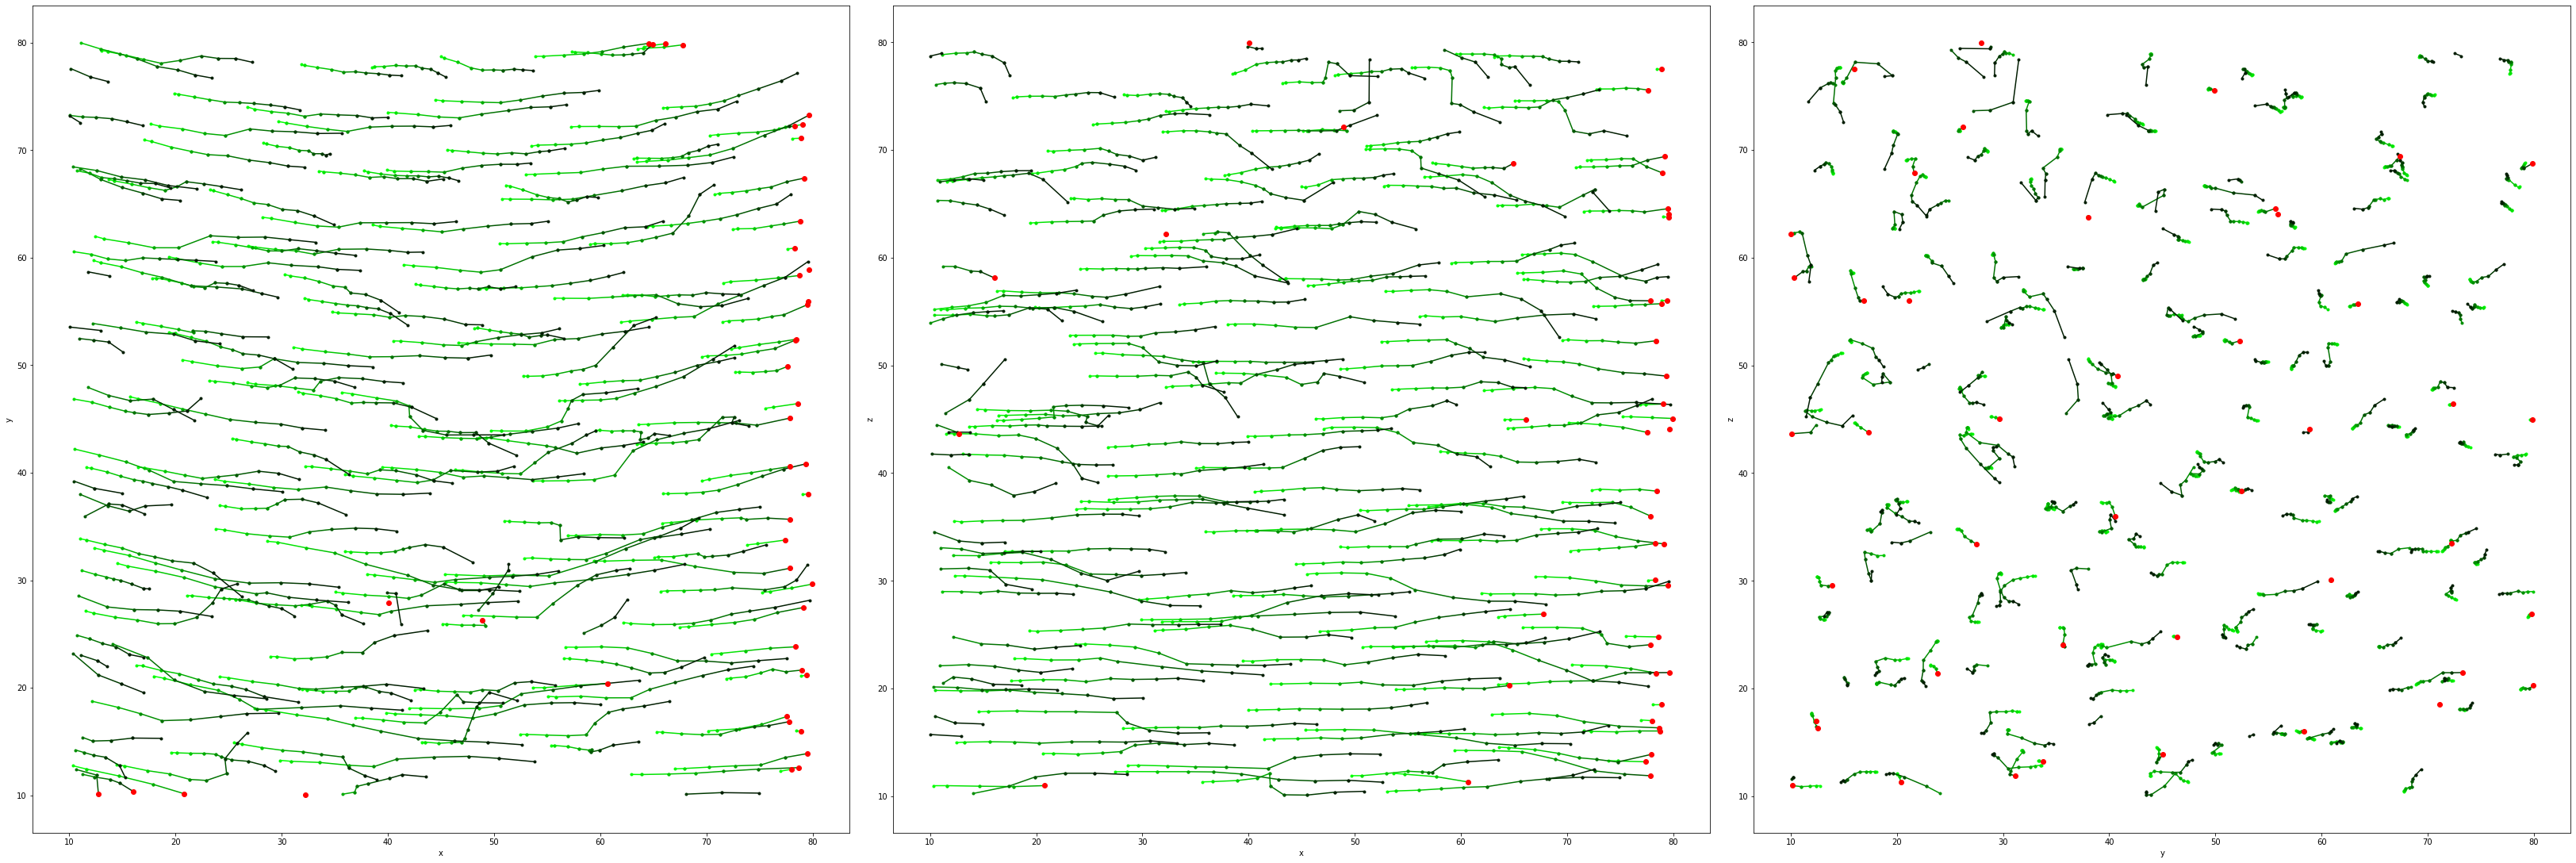

In [41]:
fig, ax = plt.subplots(1,3, figsize = (45, 15), constrained_layout=True)
# Plot of tracked bubbles (green)
for i in range(len(Listx1)):
    ax[0].plot([Listx1[i],Listx2[i]],[Listy1[i],Listy2[i]],'.-', color=lincmap.to_rgba(i))
    ax[1].plot([Listx1[i],Listx2[i]],[Listz1[i],Listz2[i]],'.-', color=lincmap.to_rgba(i))
    ax[2].plot([Listy1[i],Listy2[i]],[Listz1[i],Listz2[i]],'.-', color=lincmap.to_rgba(i))
# Plot of the lost position (red)
for i in range(len(LLostlab)):
    ax[0].plot(LLostX[i],LLostY[i],'ro')
    ax[1].plot(LLostX[i],LLostZ[i],'ro')
    ax[2].plot(LLostY[i],LLostZ[i],'ro')
# Axes
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].set_xlabel('x'); ax[1].set_ylabel('z')
ax[2].set_xlabel('y'); ax[2].set_ylabel('z')

[(10.0, 80.0),
 (10.0, 80.0),
 (10.0, 80.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 0.5, 'y'),
 Text(0.5, 0, 'z')]

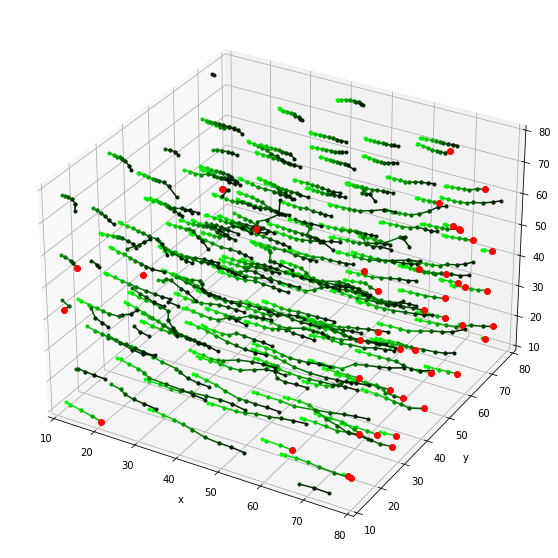

In [42]:
# in 3D!
# Plot of tracked bubbles (green)
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
for i in range(len(Listx1)):
    for j in range(len(Listx1[i])):
        ax.plot([Listx1[i][j],Listx2[i][j]],
                [Listy1[i][j],Listy2[i][j]],
                [Listz1[i][j],Listz2[i][j]],
                '.-', color=lincmap.to_rgba(i))
# Plot of the lost position (red)
for i in range(len(LLostlab)):
    ax.plot(LLostX[i],LLostY[i],LLostZ[i],'ro')
# Axes
ax.set(xlim=(10, 80), ylim=(10, 80), zlim=(10, 80),
       xlabel='x', ylabel='y', zlabel='z')

In [44]:
# If structured=True, Grid_Vavg function can be used to obtained cartesian 3D structured average flow field (here respectively along z,y,x)
# tune Range and N parrameters if you wish
Lgrid_z, Coordavg_z,Vavg_z,Vstd_z, Count_z = Grid_Vavg(Coord, v, Range=[0,90,0,90,0,90], N=[1,10,10], NanFill=True, verbose=False, structured=True)
Lgrid_y, Coordavg_y,Vavg_y,Vstd_y, Count_y = Grid_Vavg(Coord, v, Range=[0,90,0,90,0,90], N=[10,1,10], NanFill=True, verbose=False, structured=True)
Lgrid_x, Coordavg_x,Vavg_x,Vstd_x, Count_x = Grid_Vavg(Coord, v, Range=[0,90,0,90,0,90], N=[10,10,1], NanFill=True, verbose=False, structured=True)

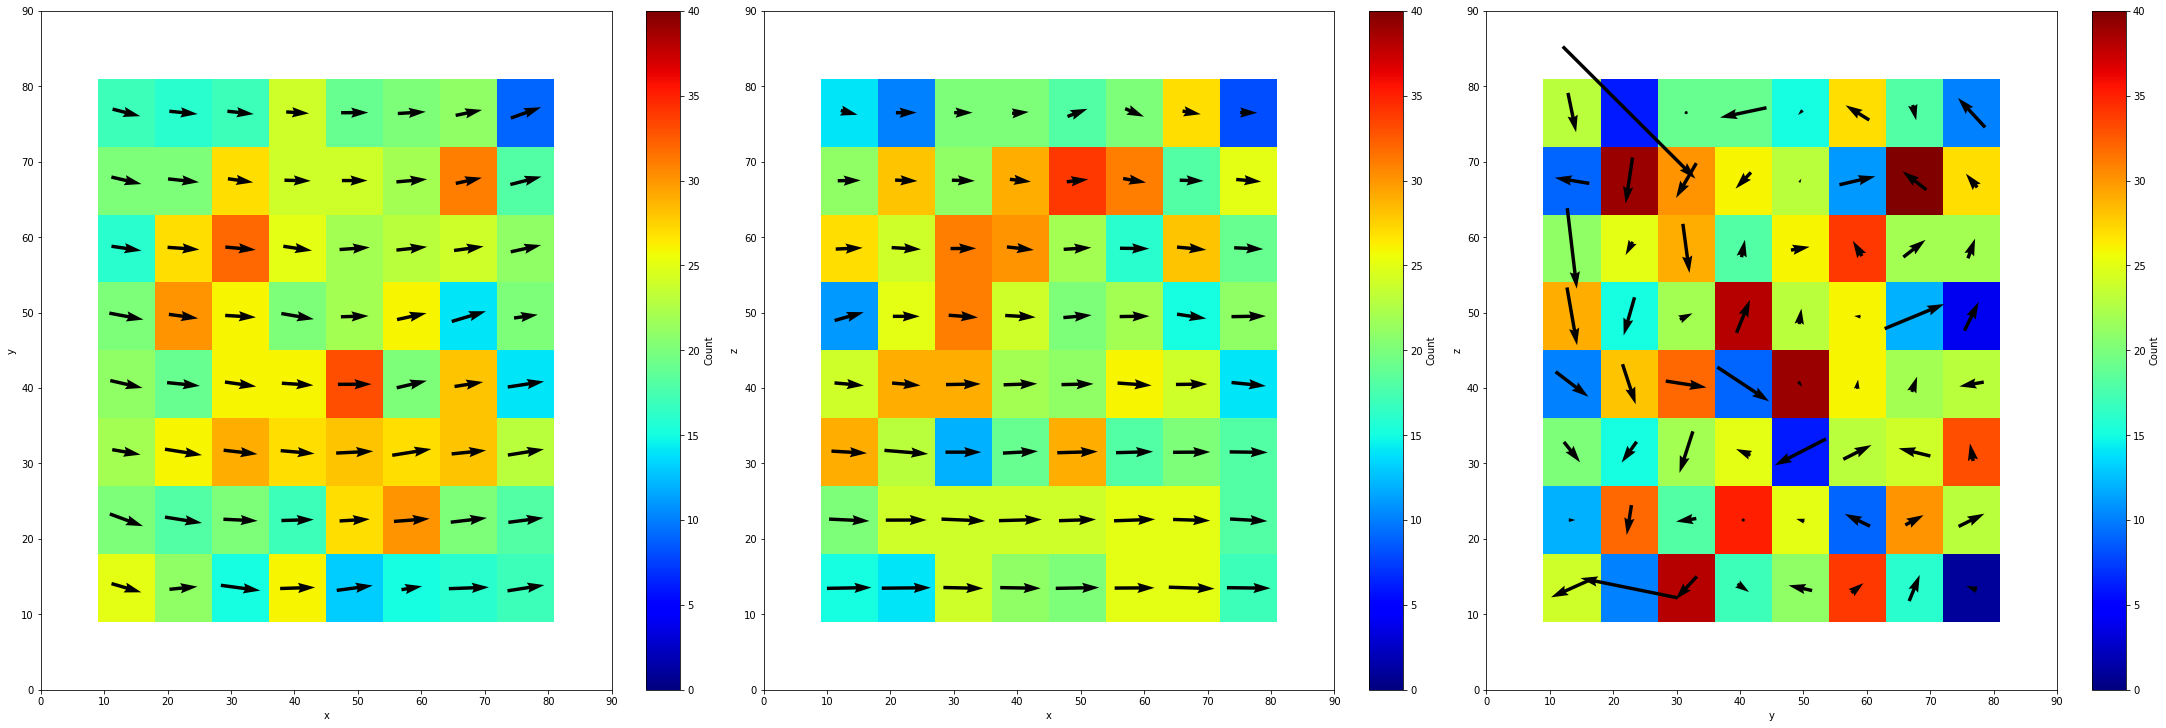

In [45]:
vmin=0   # tune this parrameter if you wish
vmax=40  # tune this parrameter if you wish

fig, ax = plt.subplots(1,3, figsize = (30, 10), constrained_layout=True)
# Colormesh plot of the number of bubble inside the averaging box
neg1=ax[0].pcolormesh(Lgrid_z[2],Lgrid_z[1], Count_z[0,:,:], cmap = 'jet', shading='nearest', vmin=vmin,vmax=vmax)
neg2=ax[1].pcolormesh(Lgrid_y[2],Lgrid_y[0], Count_y[:,0,:], cmap = 'jet', shading='nearest', vmin=vmin,vmax=vmax)
neg3=ax[2].pcolormesh(Lgrid_x[1],Lgrid_x[0], Count_x[:,:,0], cmap = 'jet', shading='nearest', vmin=vmin,vmax=vmax)
# Averaged flow field
ax[0].quiver(Lgrid_z[2],Lgrid_z[1],Vavg_z[0,:,:,2],Vavg_z[0,:,:,1], pivot='mid')
ax[1].quiver(Lgrid_y[2],Lgrid_y[0],Vavg_y[:,0,:,2],Vavg_y[:,0,:,0], pivot='mid')
ax[2].quiver(Lgrid_x[1],Lgrid_x[0],Vavg_x[:,:,0,1],Vavg_x[:,:,0,0], pivot='mid')
# Axes
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].set_xlabel('x'); ax[1].set_ylabel('z')
ax[2].set_xlabel('y'); ax[2].set_ylabel('z')
# Colorbars
fig.colorbar(neg1, label='Count')
fig.colorbar(neg2, label='Count')
fig.colorbar(neg3, label='Count')

In [52]:
# If structured=False, Grid_Vavg function can be used to obtained the same average, but unstructured. 
# Here it is convenient for plotting the velocity along x as a function of the position z
Lgrid, Coordavg,Pavg,Pstd, Count = Grid_Pavg(Coord, 
                                             v[:,2], 
                                             Range=[0,90,0,90,0,90],  # tune this parrameter if you wish
                                             N=[10,1,1],              # tune this parrameter if you wish
                                             NanFill=True, 
                                             verbose=False, 
                                             structured=False)

<ErrorbarContainer object of 3 artists>

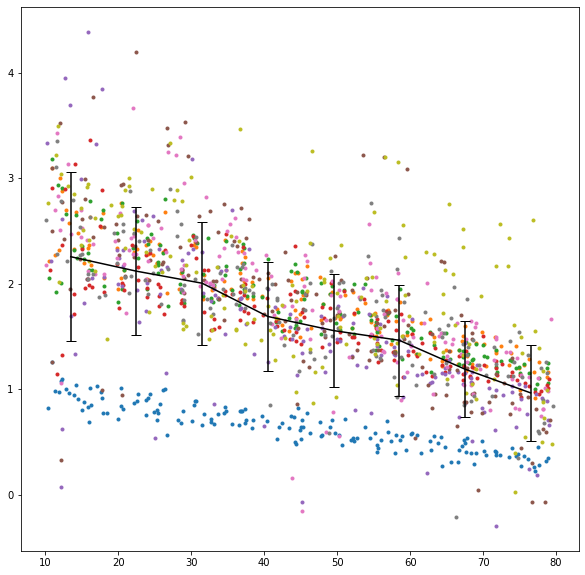

In [48]:
# Velocity along x as a function of the position z 
ax = plt.figure(figsize = (10, 10))
for vali in range(len(Listx1)):
    plt.plot(Listz1[vali], Listx2[vali]-Listx1[vali],'.')
# Averaged velocity along x as a function of the position z 
plt.errorbar(Coordavg[:,0], Pavg, yerr=Pstd, capsize=5, color='k')

# D] Tracking individual bubble over the whole time series

In [53]:
# Combine the subsequent trackings over the whole series
combined = Combine_Tracking(namesave, dirsave, imrange, verbose=False, endread='.tsv', n0=3)

In [54]:
# Convert lost bubbles data into np.nan
for axis in ['z','y','x']:
    for i in range(len(combined[axis])):
        for j in range(len(combined[axis][i])):
            if combined[axis][i][j]==-1:
                combined[axis][i][j]=np.nan

Text(0, 0.5, 'z')

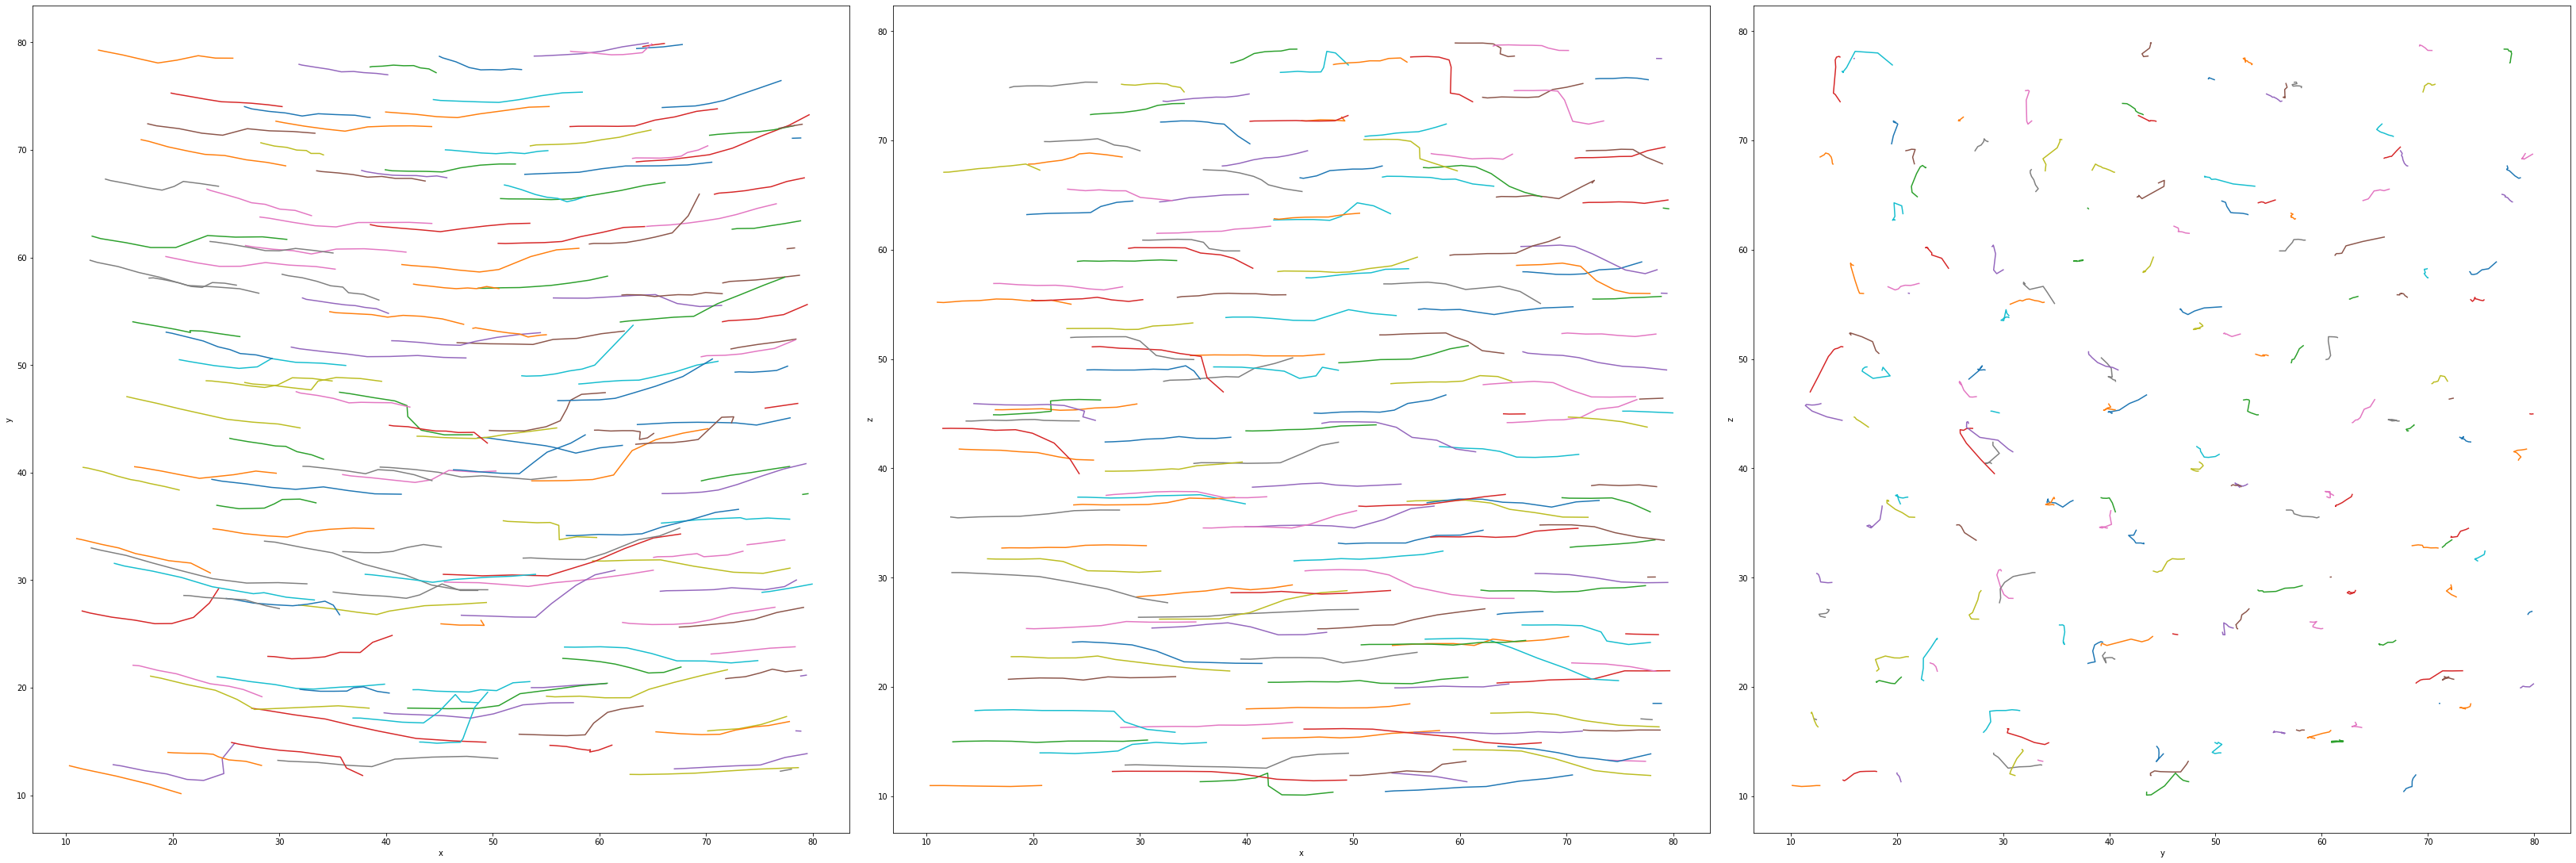

In [62]:
# Show the individual paths by a random color
fig, ax = plt.subplots(1,3, figsize = (45, 15), constrained_layout=True)
for i in range(len(combined['x'])):
    ax[0].plot(combined['x'][i],combined['y'][i])
    ax[1].plot(combined['x'][i],combined['z'][i])
    ax[2].plot(combined['y'][i],combined['z'][i])
# Axes
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].set_xlabel('x'); ax[1].set_ylabel('z')
ax[2].set_xlabel('y'); ax[2].set_ylabel('z')

[(10.0, 80.0),
 (10.0, 80.0),
 (10.0, 80.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 0.5, 'y'),
 Text(0.5, 0, 'z')]

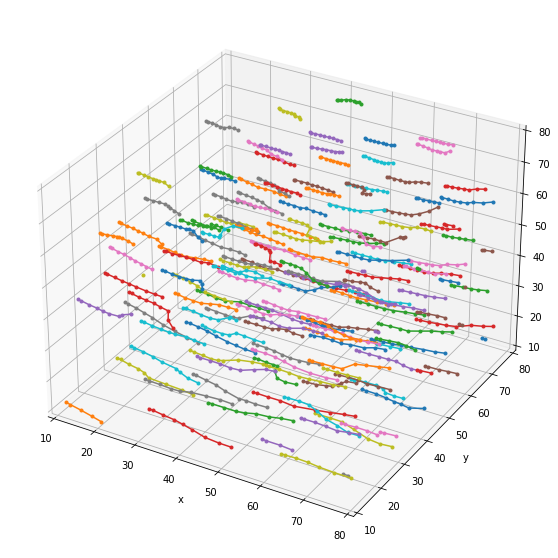

In [64]:
# in 3D!
# Show the individual paths by a random color
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
for i in range(len(combined['x'])):
    plt.plot(combined['x'][i],combined['y'][i],combined['z'][i], '.-')
# Axes
ax.set(xlim=(10, 80), ylim=(10, 80), zlim=(10, 80),
       xlabel='x', ylabel='y', zlabel='z')

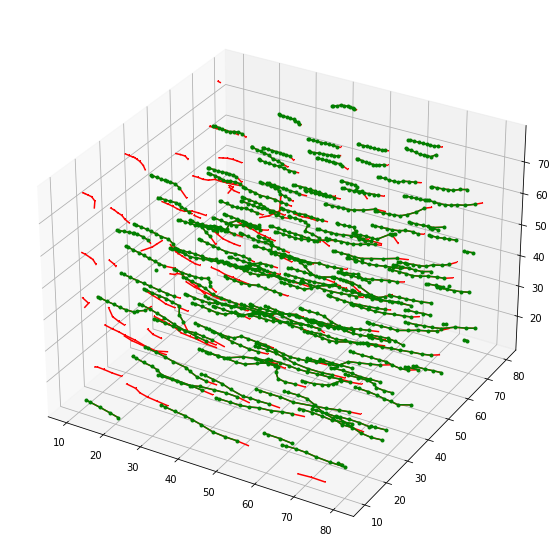

In [66]:
# in 3D!
# Show the non-tracked paths in red
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
for i in range(len(Listx1)):
    for j in range(len(Listx1[i])):
        ax.plot([Listx1[i][j],Listx2[i][j]],
                [Listy1[i][j],Listy2[i][j]],
                [Listz1[i][j],Listz2[i][j]],
                'r,-')
# Show the tracked paths in green
for i in range(len(combined['x'])):
    ax.plot(combined['x'][i],combined['y'][i],combined['z'][i], 'g.-')

In [67]:
# Create a linear colormap
lincmap = LinCmap(vmin=0, vmax=len(LLostX), first_color="b", last_color="r")

Text(0, 0.5, 'Vx (vox/image)')

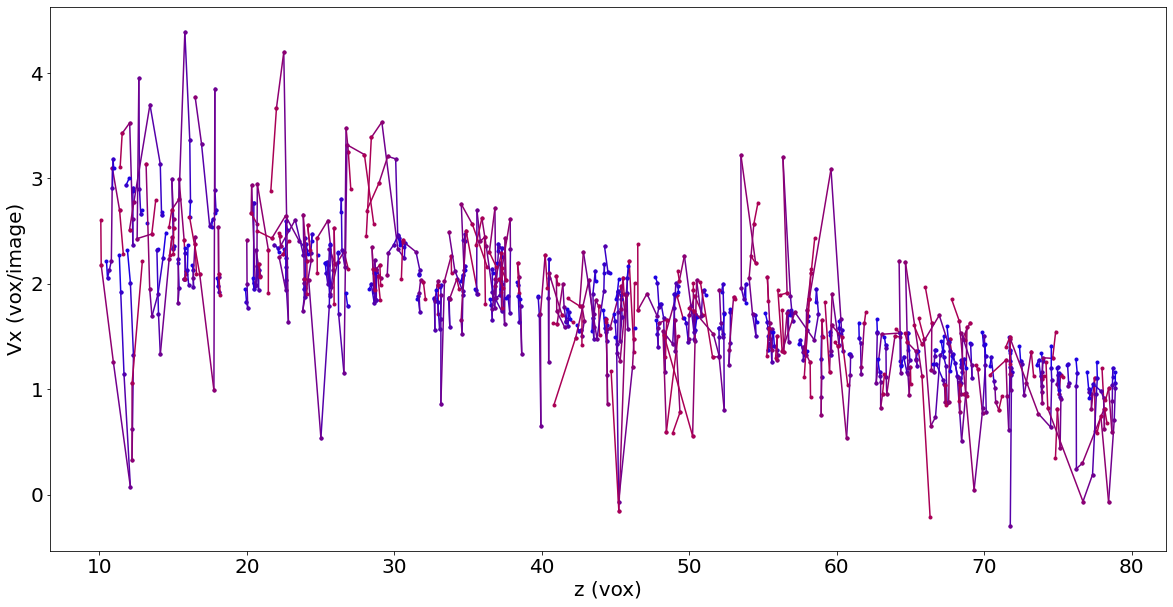

In [86]:
# Individual tracked bubble x velocity as a function of its z position
ax = plt.figure(figsize = (20, 10))
for i in range(len(combined['x'])):
    for j in range(1,len(combined['x'][i])-2):
        plt.plot([combined['z'][i][j],combined['z'][i][j+1]],
                 [combined['x'][i][j+1]-combined['x'][i][j],
                  combined['x'][i][j+2]-combined['x'][i][j+1]],
                 '.-', color=lincmap.to_rgba(j))
# Axes
plt.xlabel('z (vox)'); plt.ylabel('Vx (vox/image)')

Text(0, 0.5, 'Vz (vox/image)')

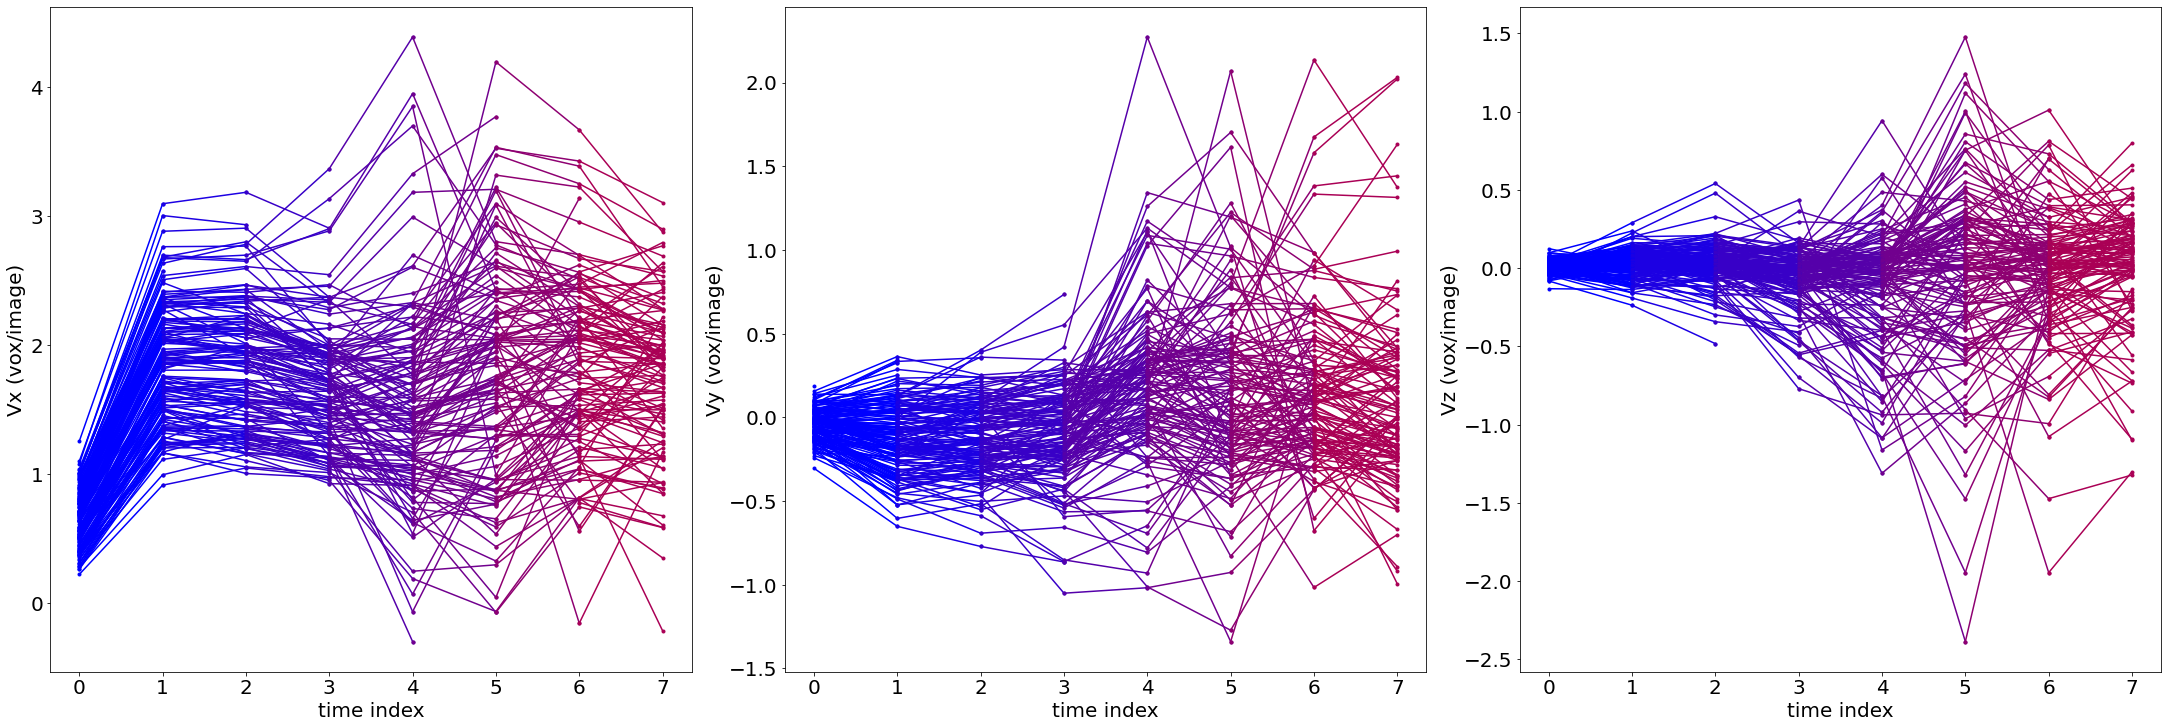

In [87]:
# Individual bubble velocity as a function of 
fig, ax = plt.subplots(1,3, figsize = (30, 10), constrained_layout=True)
for i in range(len(combined['x'])):
    for j in range(len(combined['x'][i])-2):
        ax[0].plot([j,j+1],
                 [combined['x'][i][j+1]-combined['x'][i][j],
                  combined['x'][i][j+2]-combined['x'][i][j+1]],
                 '.-', color=lincmap.to_rgba(j))
        ax[1].plot([j,j+1],
                 [combined['y'][i][j+1]-combined['y'][i][j],
                  combined['y'][i][j+2]-combined['y'][i][j+1]],
                 '.-', color=lincmap.to_rgba(j))
        ax[2].plot([j,j+1],
                 [combined['z'][i][j+1]-combined['z'][i][j],
                  combined['z'][i][j+2]-combined['z'][i][j+1]],
                 '.-', color=lincmap.to_rgba(j))
# Axes
ax[0].set_xlabel('time index'); ax[0].set_ylabel('Vx (vox/image)')
ax[1].set_xlabel('time index'); ax[1].set_ylabel('Vy (vox/image)')
ax[2].set_xlabel('time index'); ax[2].set_ylabel('Vz (vox/image)')